In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import nn
from matplotlib import pyplot as plt

1. Data Preparing and Loading
 Data can be almost anything in machine learning

 * Excel Spreadsheet
 * videos of any kind
 * Images
 * Audio
 * DNA
 * Text

 Machine Learning is a game of two parts:
 1. Get data into numerical representation.
 2. build model to learn patterns for data.

 Let's Create dataset for Linear Regression analysis..

 We'll using linear Regression formula to make straight line with **known parameters**..


In [ ]:
# create known parameters


weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.04
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


print(X[:5])
print(len(X))
print(len(y))

tensor([[0.0000],
        [0.0400],
        [0.0800],
        [0.1200],
        [0.1600]])
25
25


### 2. Splitting our data into training and testing data

one of the important concepts in machine learning in general three datasets:

* Training set (model learns patterns for this data. generally 60% dataset is training set)

* validation set (for fine tuning purposes 10% - 20% for this purposes)

* Testing set (for evaluation purposes in new data what model have learned 10% - 20%)


In [ ]:
# creating train/test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(20, 20, 5, 5)

In [ ]:
train_split

20

In [ ]:
# Lets visualize our dataset

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    ''' plot training data, test data and compares predictions. '''

    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data,train_labels, c="b",s=4,label="Training data")

    # plot testing data in green
    plt.scatter(test_data,test_labels, c="g",s=4,label="testing data")

    # Are there predictions
    if predictions is not None:
      # plot predicstions if ezist
      plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

    # show the legend
    plt.legend(prop={"size":14})

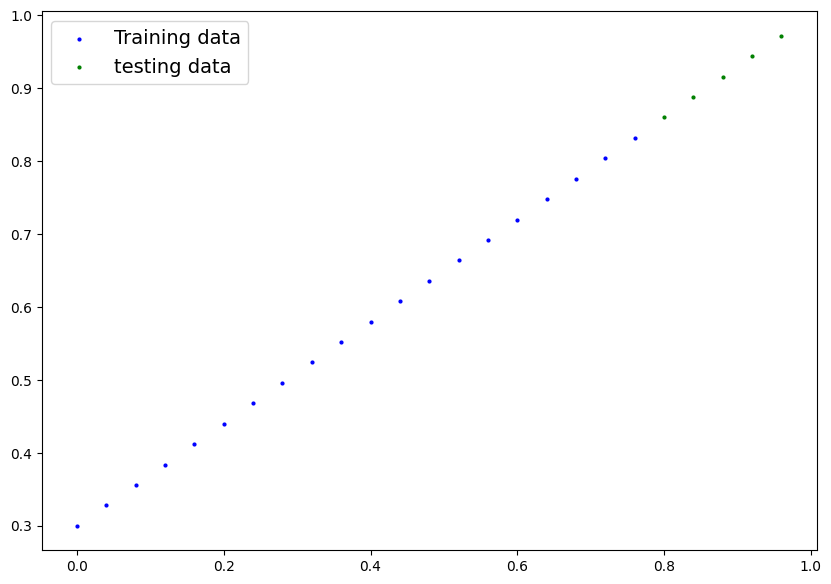

In [ ]:
plot_predictions()

In [ ]:
# # Train your model (e.g., a linear regression model)
# model.fit(X_train, y_train)

# # Make predictions on the test data
# predictions = model.predict(X_test)

# # Plot the training data, test data, and predictions
# plot_predictions(X_train, y_train, X_test, y_test, predictions)

### 3.Creating our pyTorch model


we are going to use oop's for creating classes (OOPs concepts are required)

In [ ]:
# create linear regression classes
class LinearRegression(nn.Module): # --> nn.Module has everything implicitly inherits all pytorch things required..
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1, # <-- start with random weight and try to adjust best ideal weights -->
                                          requires_grad=True, # <-- used for calcuating derivates while backpropagating .. weigts update via gradient descent -->
                                          dtype=torch.float))  # <-- pytorch bet weights float 32 -->

    self.bias=nn.Parameter(torch.randn(1, # <-- start with random bias and try to adjust best ideal bias -->
                                       requires_grad=True, # <-- used for calcuating derivates while backpropagating .. weigts update via gradient descent -->
                                       dtype=torch.float)) # <-- pytorch bet weights float 32 -->

    # forward method to define the comutation of the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # X is a input data
    return self.weights * x + self.bias # This is LinearRegression formula

# Pytorch Model building essentials
* torch.nn - contains all of the building of the computational graphs (a neural network can be considered as computational graph)

* torch.nn parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us

* torch.nn module - The base class for all neural networks modules , if we subclasss it we need to overwrite forward ()

* torch.optim - this is where optimzers in pytorch live , it will help with gradient descent

* def forward () - The forward method defines how the input tensor x is transformed by the model , it defines what happens in 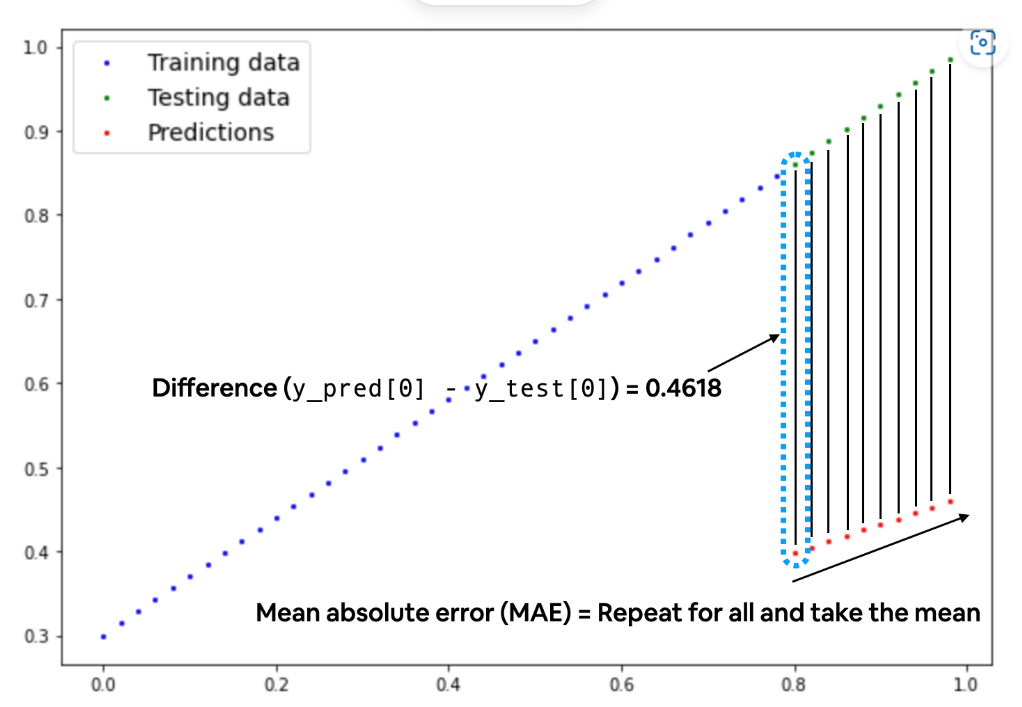forward computation



###  we have successfully created a model. Now we are checking what's inside the model parameter using `.parameters()`



In [ ]:
# creating random seed
torch.manual_seed(42) # if we don't put this then we get parameter values different in each time..

# create instance of the model class
model_0=LinearRegression()

# print (model_0)

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named dict
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias # this is ideal value

(0.7, 0.3)

### Making Predictions with `torch.inference_mode()`

for seeing model predictive power we need to see how well it predicts `y_test` based on `x_test`t

when we pass data through model we need to run this `forward ()` method.





In [ ]:
X_test,y_test

(tensor([[0.8000],
         [0.8400],
         [0.8800],
         [0.9200],
         [0.9600]]),
 tensor([[0.8600],
         [0.8880],
         [0.9160],
         [0.9440],
         [0.9720]]))

In [ ]:
y_preds=model_0(X_test) # 1
y_preds

tensor([[0.3982],
        [0.4116],
        [0.4251],
        [0.4386],
        [0.4520]], grad_fn=<AddBackward0>)

In [ ]:
# making predictions with model   # 2
with torch.inference_mode():
  y_preds=model_0(X_test)

# with torch.no_grad(): # this also does same ting as inference mode but there are many advantages with inference mode over this ..
#   y_preds=model_0(X_test)

In [ ]:
y_preds # we can see that our model is predicting the values in `List` format same like `y_test` ..

tensor([[0.3982],
        [0.4116],
        [0.4251],
        [0.4386],
        [0.4520]])

### This above both provides same result but the main difference is keeping track of gradients of parameters on each propagation is not done on inferencing, like we are not training only inferencing also inferencing faster.

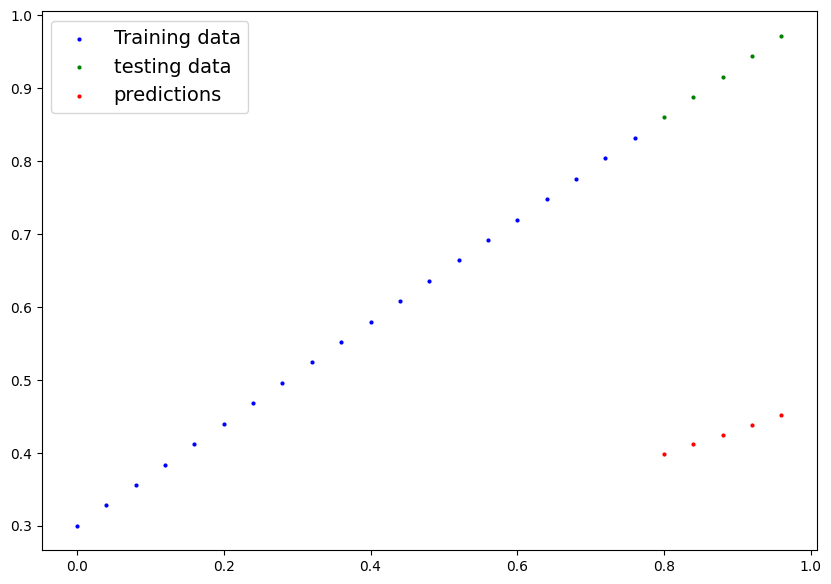

In [ ]:
plot_predictions(predictions=y_preds) # we can see that our predictions value is same as testing value which means loss function is o.

###  Training Model

from poor representation of data to better representation of data. from *unknown* parameters to *known parameters*

One way for using how poor and wrong our models is predicting we can use loss function

*Note:Loss function may also be called as cost function or criterion in different areas. in our case it is as cost function.

we need to train:

* **Loss Function**: A function to measure how wrong is our model predictions are from ideal output. generally, low loss function is better

* **optimizers**: It takes into account a loss of model and adjusts the model's parameters (eg. weights & biases) to improve loss functions

And specially for pytorch we need,

* training loop
* testing loop

In [ ]:
# mean absoulte error vaneko chai original data point bata prediction wala data points ko distance lini ani sabai data points ko mean lini..

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.

Mean absolute error (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

And we'll use SGD, torch.optim.SGD(params, lr) where:

params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

In [ ]:
# loss function
loss_fn=nn.L1Loss()

# optimizers setupping
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01) # SGD our model takes random inputs so that it minimizes the loss.

# for classification we use binary cross entropy

### Optimization loop in PyTorch

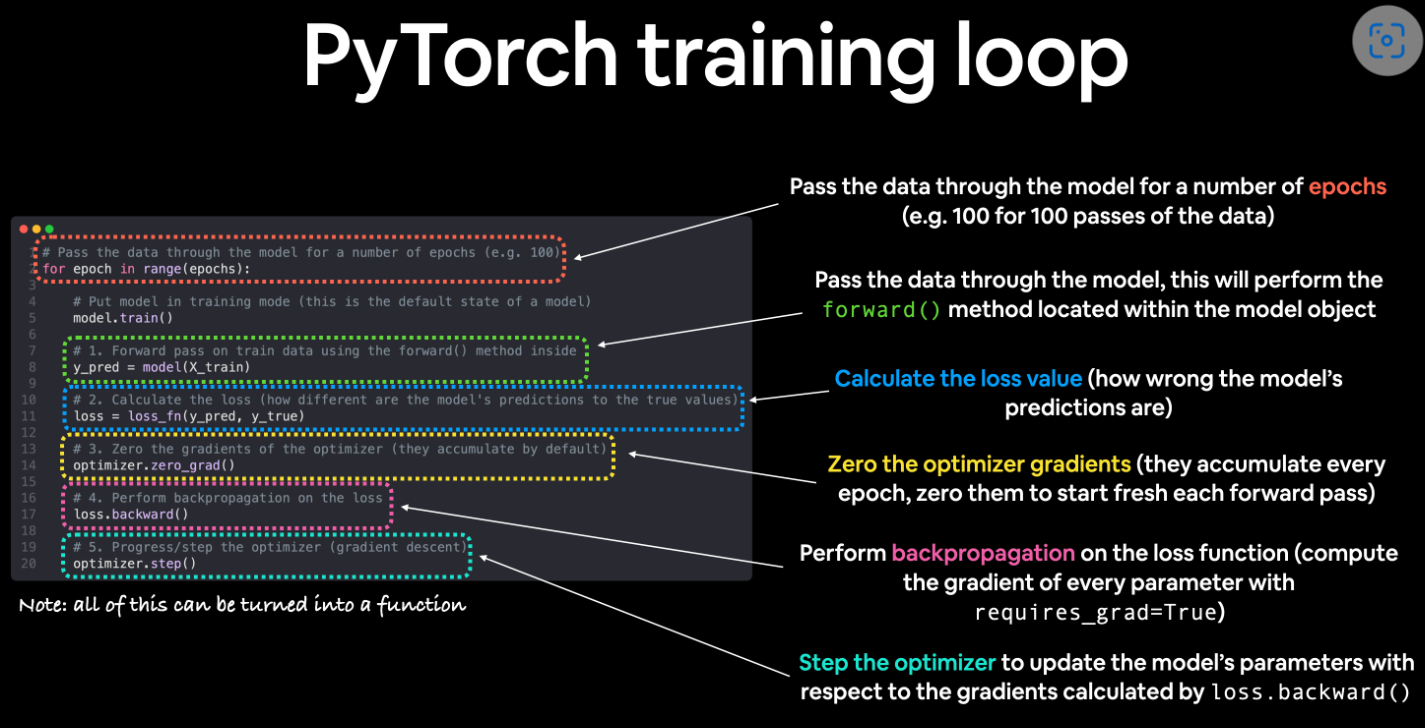

# Building Training and Testing loop in pytorch

Things needed in Training Loop
0. Loop through the data
1. Forward pass (this involves data moving from forward function) to make predictions on data also known as forward propagation
2. caluate the loss (compares forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwards through
5. optimizer step (it is used to minimize the loss function)

In [ ]:
torch.manual_seed(42)

# epoch is one loop through the data one epoch means one complete cycle
epochs=1000

# tracking different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
  # set model to training mode
  model_0.train() # setting model to training mode

  # model_0.eval() # it turns off gradient tracking

  # 1. forward pass
  y_pred=model_0(X_train)

  # 2. calculate the loss
  loss=loss_fn(y_pred,y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad() # This step is crucial for correctly computing the gradients during backpropagation. It sets the gradients of all the parameters (weights and biases) in the model to zero before starting the backpropagation process.
  #  This is necessary because the gradients are accumulated over multiple iterations (batches) of training data. If we don't zero out the gradients, the optimizer would try to update the parameters based on the summed
  #  gradients from the previous iterations, leading to incorrect weight updates.

  # 4. loss backward
  loss.backward()

  # 5. optimizer step perform gradient descent
  optimizer.step()

  # 5 testing code
  model_0.eval() # turns off different model in settings not needed for evaluation/testing. batch or dropout layers..

  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)


  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

  print(model_0.state_dict()) # shows model state dict




Epoch: 0 | MAE Train Loss: 0.30924829840660095 | MAE Test Loss: 0.47755908966064453 
OrderedDict([('weights', tensor([0.3405])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3443])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3481])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3519])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3557])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3595])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3633])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3671])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3709])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3747])), ('bias', tensor([0.2288]))])
Epoch: 10 | MAE Train Loss: 0.1948082149028778 | MAE Test Loss: 0.34411901235580444 
OrderedDict([('weights', tensor([0.3785])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', te

In [ ]:
with torch.inference_mode():
  test_pred_new=model_0(X_test)

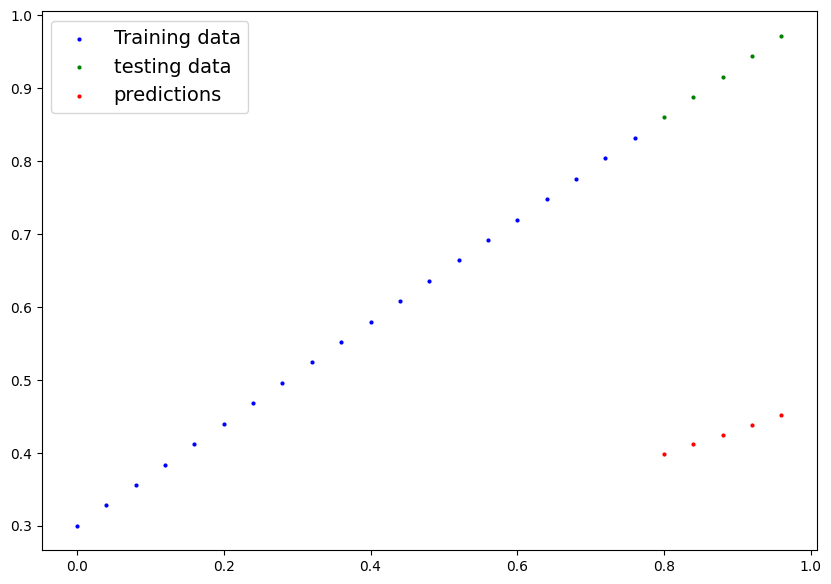

In [ ]:
plot_predictions(predictions=y_preds)

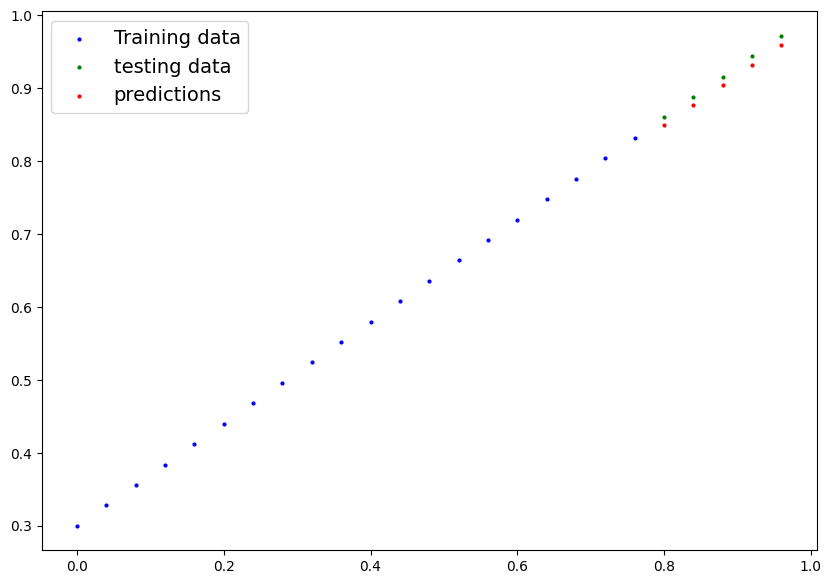

In [ ]:
plot_predictions(predictions=test_pred_new.cpu())

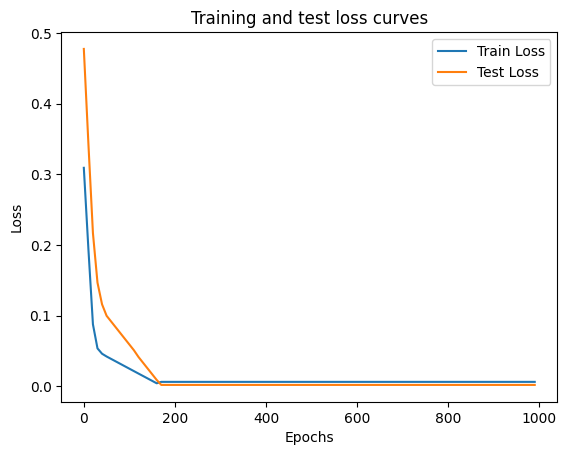

In [ ]:
plt.plot(epoch_count,loss_values,label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Saving and Loading model in pytorch

For saving and loading models in PyTorch, there are three main methods you should be aware of all of below have been taken from the PyTorch:

`torch.save` --> Saves a serialized object to disk using Python's `pickle` utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.

`torch.load` --> Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).

`torch.nn.Module.load_state_dict`--> Loads a model's parameter dictionary `(model.state_dict())` using a saved `state_dict()` object.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
model_0.state_dict() # since we have save model rather than actual model

OrderedDict([('weights', tensor([0.6895])), ('bias', tensor([0.2978]))])

In [ ]:
# to load the saved state dict model we have to instantiate the new model of class
loaded_model_0 = LinearRegression()

# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6895])), ('bias', tensor([0.2978]))])

In [ ]:
# make prediction from loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8494],
        [0.8769],
        [0.9045],
        [0.9321],
        [0.9597]])

### Creating new regresiion model with linear layer

In [ ]:
weight = 0.4
bias = 0.2

# Create data
start = 0
end = 1
step = 0.04
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(20, 20, 5, 5)

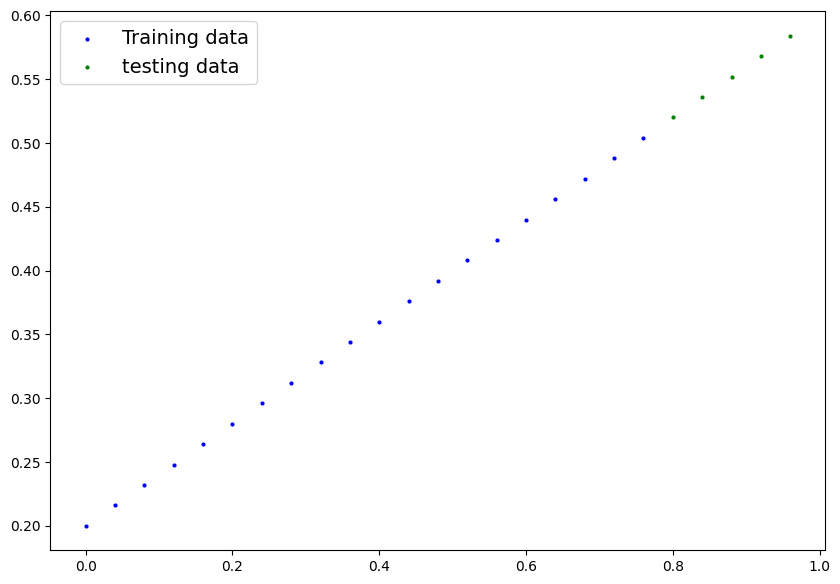

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
#creating linear regression model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.linear_layer(x)

  # Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# # Set model to GPU if it's availalble, otherwise it'll default to CPU
# model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
# next(model_1.parameters()).device

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
epochs=1000
for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred=model_1(X_train)
  # 2. calculate the loss
  loss=loss_fn(y_pred,y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # testing

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)

  if epoch%100==0:
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
  print(model_1.state_dict())

Epoch: 0 | MAE Train Loss: 0.7685325145721436 | MAE Test Loss: 0.9374578595161438 
OrderedDict([('linear_layer.weight', tensor([[0.7607]])), ('linear_layer.bias', tensor([0.8200]))])
OrderedDict([('linear_layer.weight', tensor([[0.7569]])), ('linear_layer.bias', tensor([0.8100]))])
OrderedDict([('linear_layer.weight', tensor([[0.7531]])), ('linear_layer.bias', tensor([0.8000]))])
OrderedDict([('linear_layer.weight', tensor([[0.7493]])), ('linear_layer.bias', tensor([0.7900]))])
OrderedDict([('linear_layer.weight', tensor([[0.7455]])), ('linear_layer.bias', tensor([0.7800]))])
OrderedDict([('linear_layer.weight', tensor([[0.7417]])), ('linear_layer.bias', tensor([0.7700]))])
OrderedDict([('linear_layer.weight', tensor([[0.7379]])), ('linear_layer.bias', tensor([0.7600]))])
OrderedDict([('linear_layer.weight', tensor([[0.7341]])), ('linear_layer.bias', tensor([0.7500]))])
OrderedDict([('linear_layer.weight', tensor([[0.7303]])), ('linear_layer.bias', tensor([0.7400]))])
OrderedDict([('li

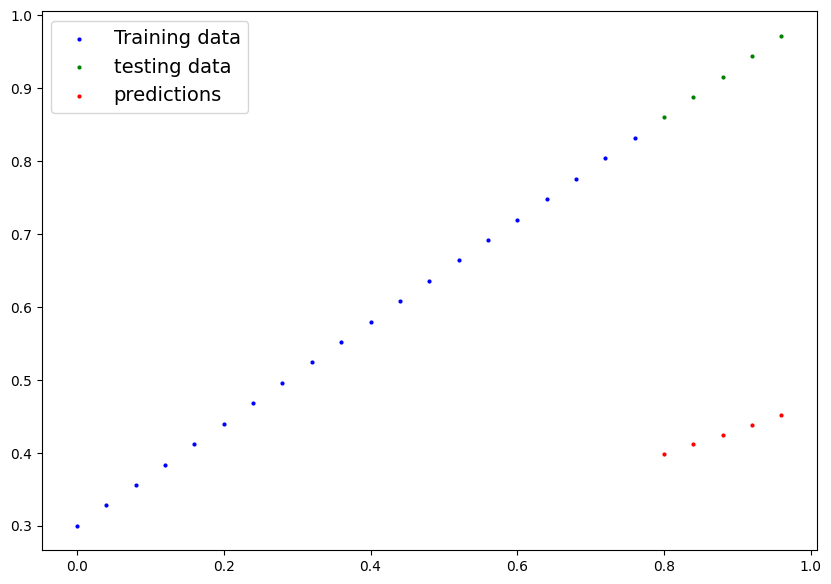

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.4107]])),
             ('linear_layer.bias', tensor([0.2020]))])

And the original values for weights and bias are:
weights: 0.4, bias: 0.2


In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds_new = model_1(X_test)
y_preds

tensor([[0.5306],
        [0.5470],
        [0.5634],
        [0.5799],
        [0.5963]])

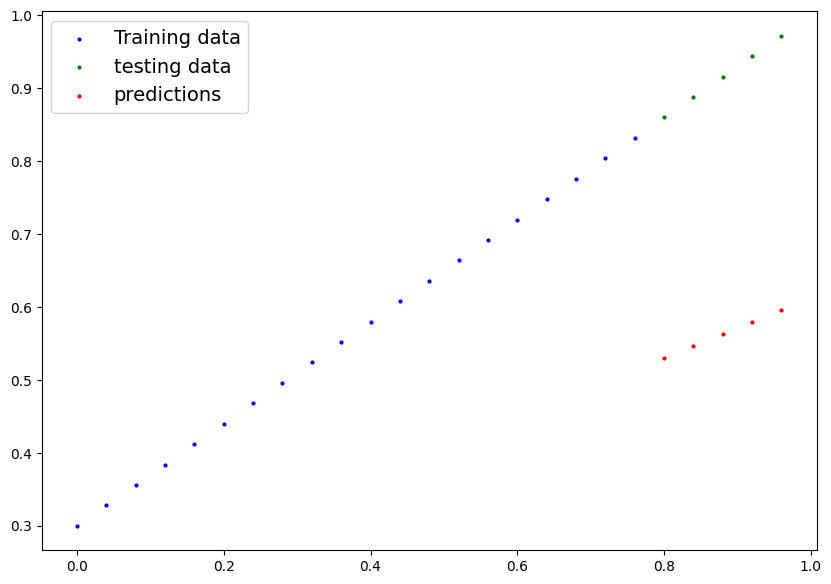

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds_new)